In [455]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (10, 5)

In [456]:
df = pd.read_csv('data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206474 entries, 0 to 206473
Data columns (total 76 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   city                                 206474 non-null  object 
 1   floor                                76209 non-null   float64
 2   id                                   206474 non-null  object 
 3   lat                                  206474 non-null  float64
 4   lng                                  206474 non-null  float64
 5   osm_amenity_points_in_0.001          206474 non-null  int64  
 6   osm_amenity_points_in_0.005          206474 non-null  int64  
 7   osm_amenity_points_in_0.0075         206474 non-null  int64  
 8   osm_amenity_points_in_0.01           206474 non-null  int64  
 9   osm_building_points_in_0.001         206474 non-null  int64  
 10  osm_building_points_in_0.005         206474 non-null  int64  
 11  osm_building_

In [457]:
df.describe()

,floor,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,...,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,total_square,realty_type
count,76209.000000,206474.000000,206474.000000,206474.000000,206474.000000,206474.000000,206474.000000,206474.000000,206474.000000,206474.000000,...,206474.000000,206474.000000,195541.000000,186141.000000,193961.000000,183936.000000,194311.000000,184340.000000,206474.000000,206474.000000
mean,1.856802,54.343090,47.505203,2.686672,40.283300,80.950328,132.200800,0.038155,0.891488,2.058400,...,99.519920,29.842290,2031.848114,641.936210,7.071113,7.383622,1967.588267,1968.017046,509.704513,54.850926
std,5.416645,4.255719,16.693365,4.180174,52.692116,103.803026,169.929844,0.397521,6.963436,14.904702,...,85.043363,27.591946,1355.356057,445.564108,3.559878,4.259349,46.431030,55.031146,1721.436830,47.864524
min,-3.000000,42.651897,19.892178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.100000,10.000000
25%,1.000000,53.225391,37.583230,0.000000,7.000000,16.000000,28.000000,0.000000,0.000000,0.000000,...,38.000000,9.000000,917.000000,285.000000,4.592233,4.625000,1960.089005,1959.980000,65.000000,10.000000
50%,1.000000,55.677577,39.676300,1.000000,22.000000,46.000000,77.000000,0.000000,0.000000,0.000000,...,85.000000,25.000000,1946.000000,599.000000,6.386792,6.418393,1970.936170,1971.709677,128.000000,10.000000
75%,1.000000,56.296827,55.930234,4.000000,51.000000,100.000000,164.000000,0.000000,0.000000,1.000000,...,139.000000,43.000000,2970.000000,934.000000,8.732143,9.133333,1983.816986,1987.000000,336.975000,110.000000
max,123.000000,69.492140,151.777000,46.000000,454.000000,850.000000,1392.000000,27.000000,586.000000,949.000000,...,733.000000,289.000000,18392.000000,6105.000000,53.717949,221.666667,2019.000000,2020.000000,40000.000000,110.000000


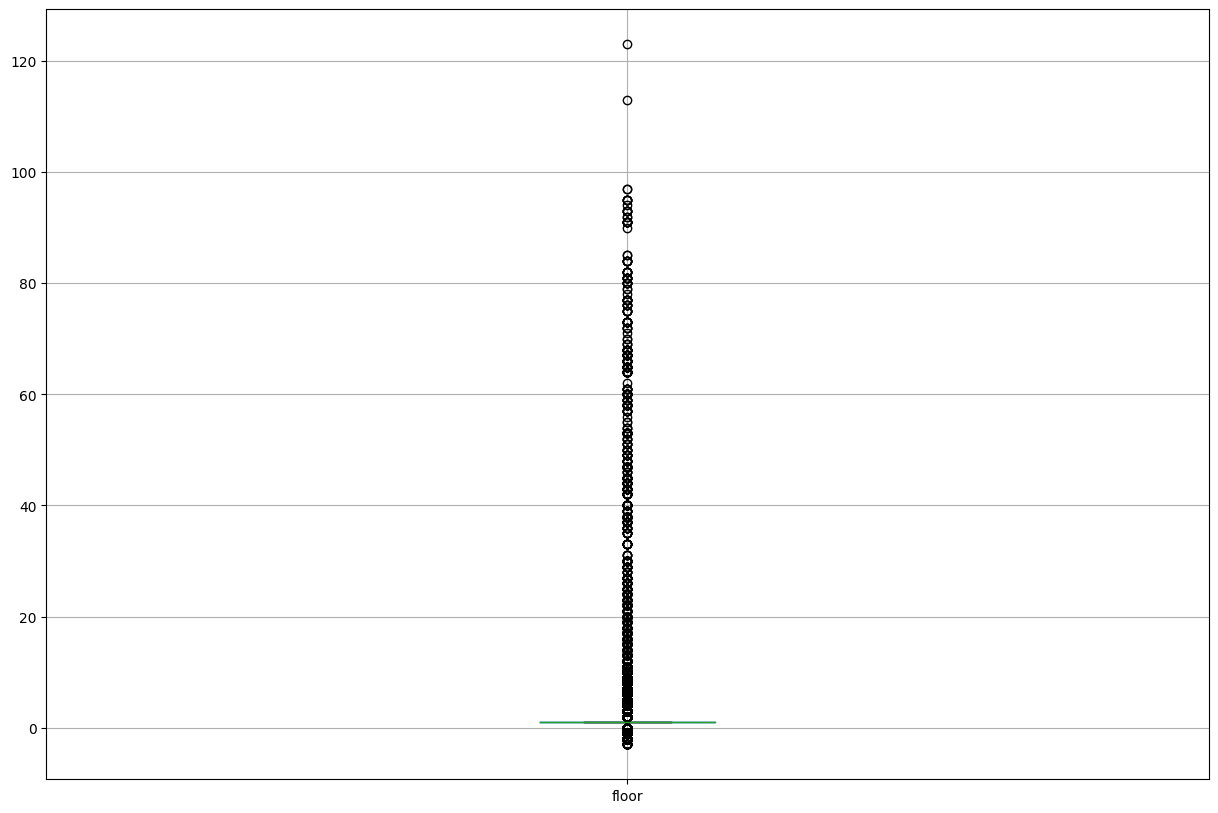

In [458]:
df.boxplot('floor', figsize=(15, 10))
plt.show()

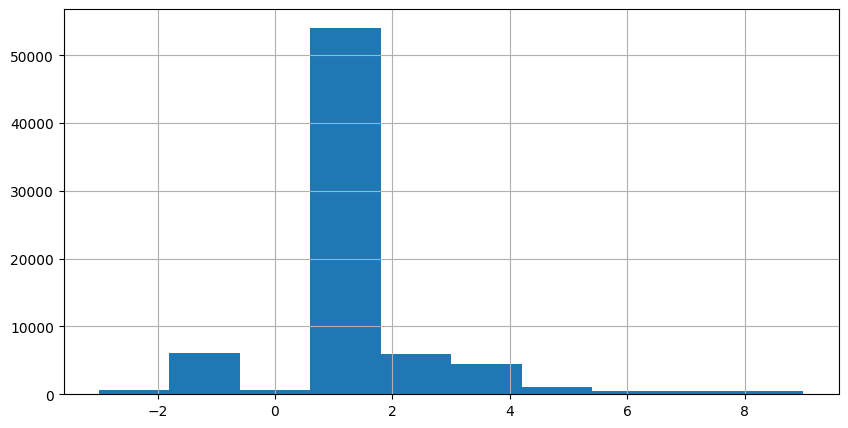

In [459]:
df[(df.floor < 10)].floor.hist()
plt.show()

In [460]:
pd.options.display.max_rows = 5000
cityFrequency = df.city.value_counts(normalize=True)
print(cityFrequency)

Москва                                                                                             0.203033
Санкт-Петербург                                                                                    0.067548
Краснодар                                                                                          0.046994
Екатеринбург                                                                                       0.030309
Новосибирск                                                                                        0.023848
Челябинск                                                                                          0.022395
Самара                                                                                             0.022206
Казань                                                                                             0.021577
Тюмень                                                                                             0.021208
Уфа                         

In [461]:
def isMediumCity(name):
  return cityFrequency[name] >= 0.005 and cityFrequency[name] < 0.015

def isSmallCity(name):
  return cityFrequency[name] >= 0.001 and cityFrequency[name] < 0.005 

def isLittleCity(name):
  return cityFrequency[name] >= 0.001 and cityFrequency[name] < 0.005 

df = df.assign(
  city_moskow=((df.city == "Москва")).astype(int),
  city_saint_petersburg=((df.city == "Санкт-Петербург")).astype(int),
  city_krasnodar=((df.city == "Краснодар")).astype(int),
  city_ekaterinburg=((df.city == "Екатеринбург")).astype(int),
  city_novosibirsk=((df.city == "Новосибирск")).astype(int),
  city_chelyabinsk=((df.city == "Челябинск")).astype(int),
  city_samara=((df.city == "Самара")).astype(int),
  city_kazan=((df.city == "Казань")).astype(int),
  city_tymen=((df.city == "Тюмень")).astype(int),
  city_ufa=((df.city == "Уфа")).astype(int),
  city_nino=((df.city == "Нижний Новгород")).astype(int),
  city_rod=((df.city == "Ростов-на-Дону")).astype(int),
  city_medium=((df.city.apply(isMediumCity))).astype(int),
  city_small=((df.city.apply(isSmallCity))).astype(int),
  city_little=((df.city.apply(isLittleCity))).astype(int)
)

In [462]:
def amenityDependency(in100m, in500m, in750m, in1000m):
  return in100m ** 1.5 + (in500m - in100m) ** 0.8 + (in750m - in500m) ** 0.6 + (in1000m - in750m) ** 0.4

In [463]:
df = df.assign(
  amenity=df.apply(lambda row: amenityDependency(row['osm_amenity_points_in_0.001'], 
                                                  row['osm_amenity_points_in_0.005'],
                                                  row['osm_amenity_points_in_0.0075'],
                                                  row['osm_amenity_points_in_0.01']), 
                    axis=1)
)

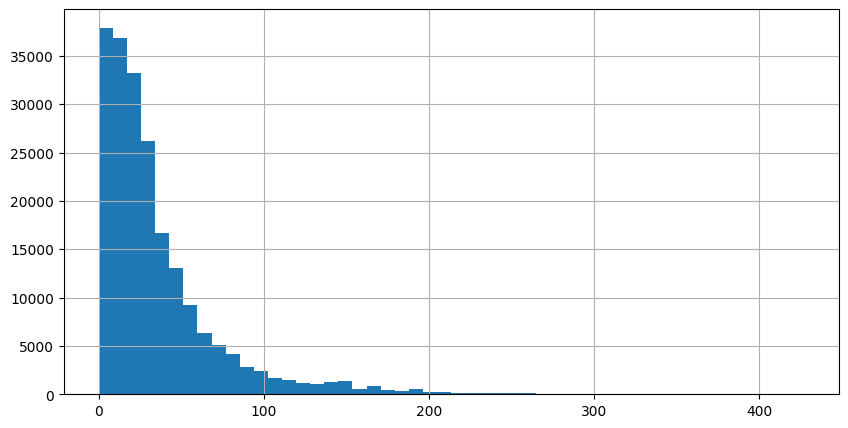

In [464]:
df.amenity.hist(bins=50)
plt.show()

In [465]:
from math import log1p
df = df.assign(
  amenity_ln=df.amenity.apply(log1p)
)

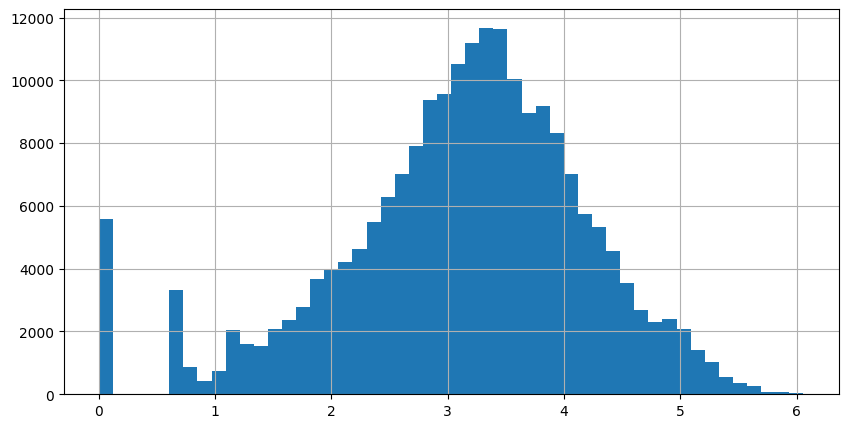

In [466]:
df.amenity_ln.hist(bins=50)
plt.show()

In [467]:
def medcouple(x):
  Q2 = x.quantile(q=0.5)
  dist = np.asarray([])
  for i in range(0, len(x)):
    for j in range(0, len(x)):
      if x[i] != x[j] and x[i] <= Q2 and x[j] < Q2:
        np.append(dist, (x[j] - Q2) - (Q2 - x[i])) / (x[j] - x[i])
  return dist.median()

In [468]:
median = df.amenity_ln.median()
print(median)
df = df.assign(
  amenity_ln_center=df.amenity_ln.apply(lambda x: x - median)
)

3.231941996852354


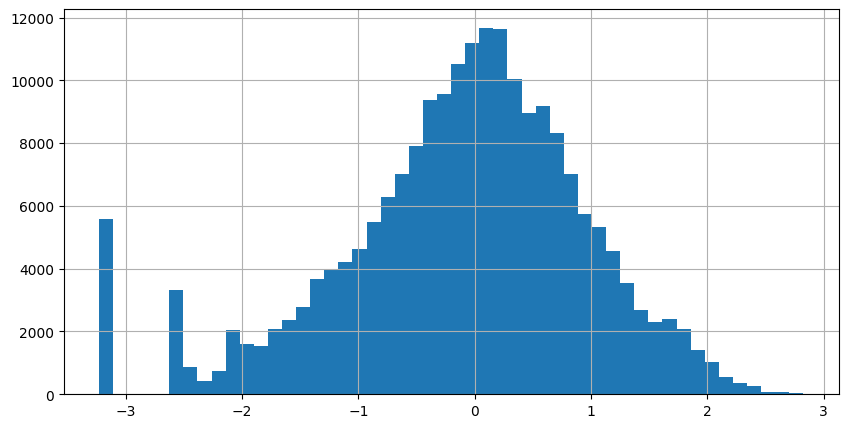

In [469]:
df.amenity_ln_center.hist(bins=50)
plt.show()

In [470]:
q25, q75 = df.amenity_ln_center.quantile(q=0.25), df.amenity_ln_center.quantile(q=0.75)
print("q25 =", q25, "\nq75 =", q75)

q25 = -0.6877662961896158 
q75 = 0.5932989661528209


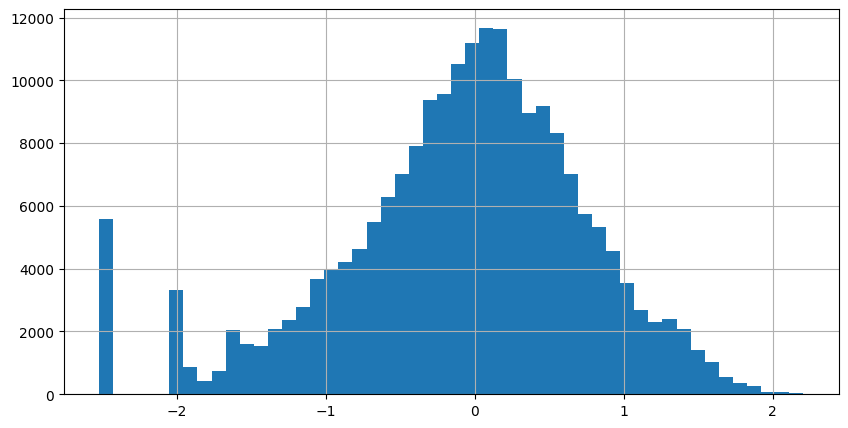

In [471]:
median = df.amenity_ln_center.median()
df = df.assign(
  amenity_ln_center_norm=df.amenity_ln_center.apply(lambda x: (x - median) / (q75 - q25))
)
df.amenity_ln_center_norm.hist(bins=50)
plt.show()

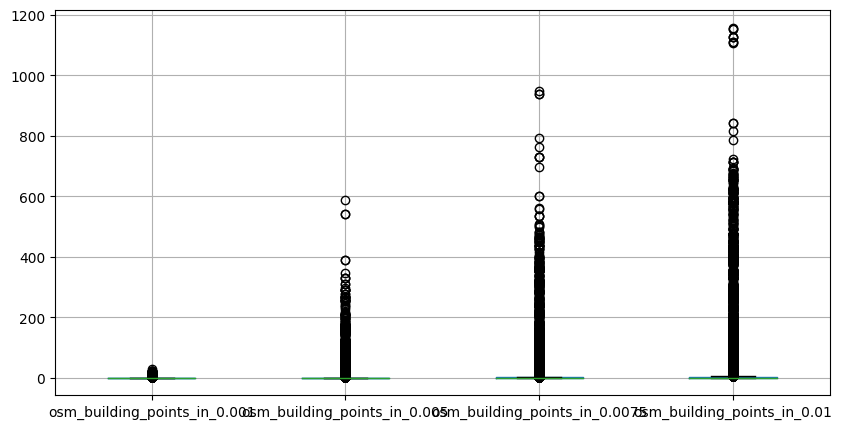

In [472]:
df.boxplot(['osm_building_points_in_0.001',
            'osm_building_points_in_0.005',
            'osm_building_points_in_0.0075',
            'osm_building_points_in_0.01'
])
plt.show()

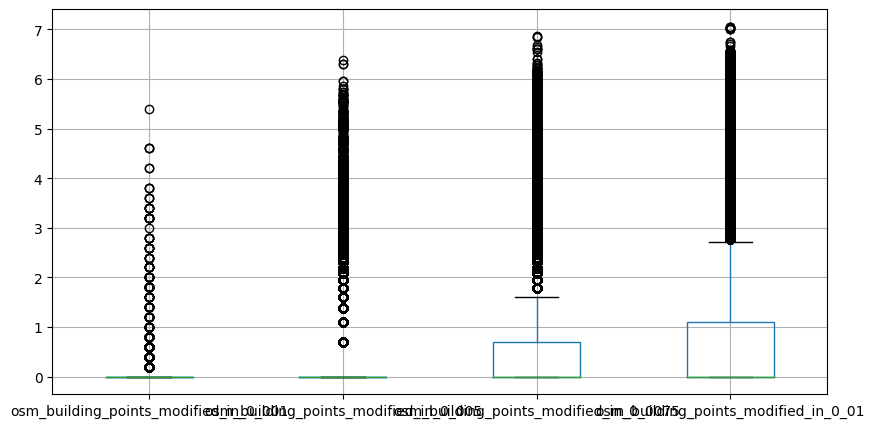

In [473]:
df = df.assign(
  osm_building_points_modified_in_0_001=df['osm_building_points_in_0.001'] / 5.0,
  osm_building_points_modified_in_0_005=df['osm_building_points_in_0.005'].apply(log1p),
  osm_building_points_modified_in_0_0075=df['osm_building_points_in_0.0075'].apply(log1p),
  osm_building_points_modified_in_0_01=df['osm_building_points_in_0.01'].apply(log1p),
)

df.boxplot(['osm_building_points_modified_in_0_001',
            'osm_building_points_modified_in_0_005',
            'osm_building_points_modified_in_0_0075',
            'osm_building_points_modified_in_0_01'
])
plt.show()

In [474]:
def buildingDependency(in100m, in500m, in750m, in1000m):
  return in100m  * 0.4 + (in500m - in100m) ** 0.6 + (in750m - in500m) ** 0.8 + (in1000m - in750m) ** 1.5

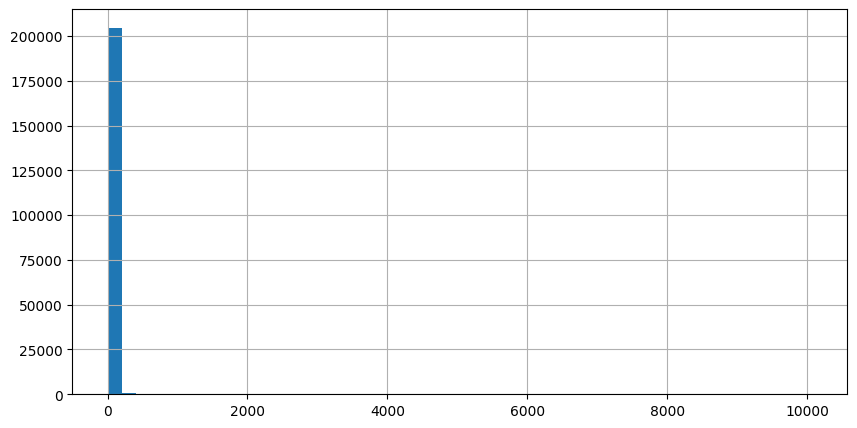

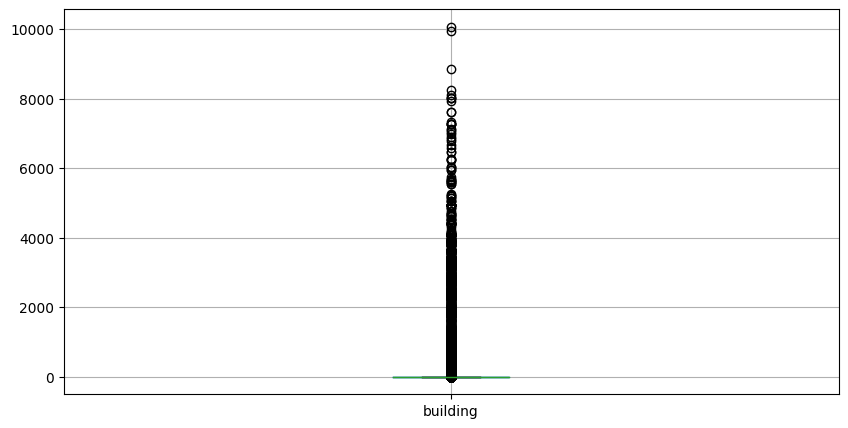

In [475]:
df = df.assign(
  building=df.apply(lambda row: buildingDependency(row['osm_building_points_in_0.001'],
                                                    row['osm_building_points_in_0.005'],
                                                    row['osm_building_points_in_0.0075'],
                                                    row['osm_building_points_in_0.01']), 
                    axis=1)
  )

df.building.hist(bins=50)
plt.show()

df.boxplot('building')
plt.show()

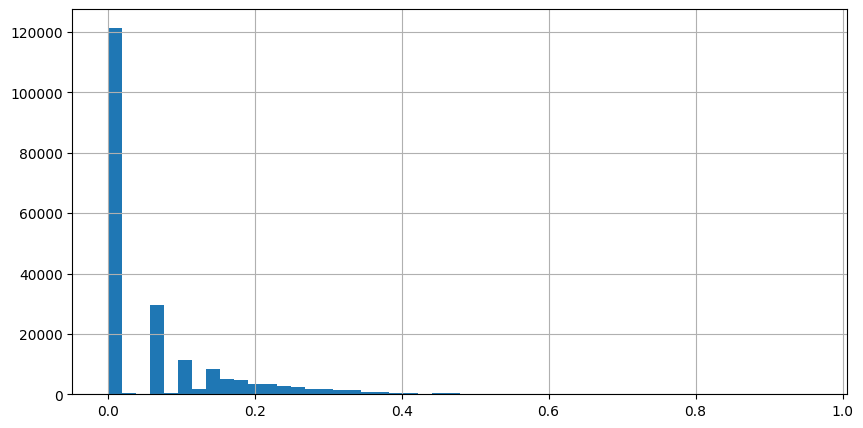

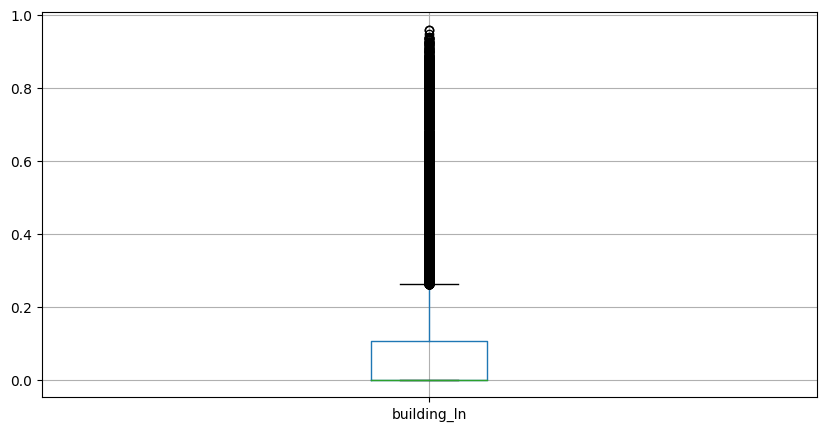

In [476]:
import math

df = df.assign(
  building_ln=df.building.apply(lambda x: math.log(x + 1, 15000))
)
df.building_ln.hist(bins=50)
plt.show()

df.boxplot('building_ln')
plt.show()

:(

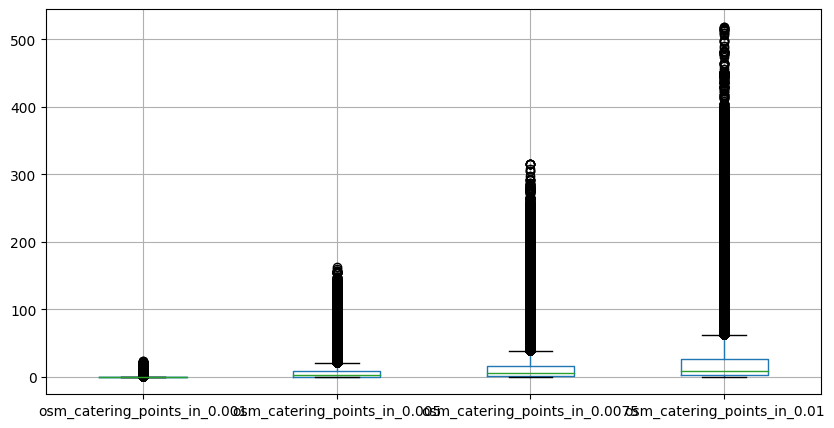

In [477]:
df.boxplot(['osm_catering_points_in_0.001',
            'osm_catering_points_in_0.005',
            'osm_catering_points_in_0.0075',
            'osm_catering_points_in_0.01'
])
plt.show()

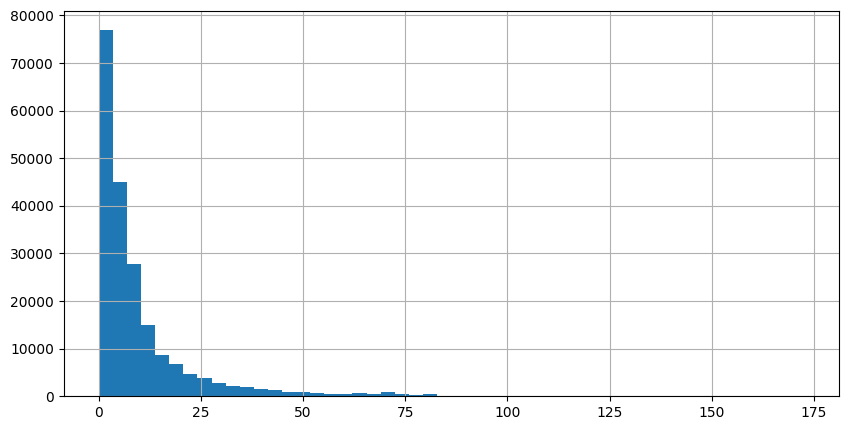

In [478]:
df = df.assign(
  catering=df.apply(lambda row: amenityDependency(row['osm_catering_points_in_0.001'], 
                                                  row['osm_catering_points_in_0.005'],
                                                  row['osm_catering_points_in_0.0075'],
                                                  row['osm_catering_points_in_0.01']), 
                    axis=1)
)
df.catering.hist(bins=50)
plt.show()

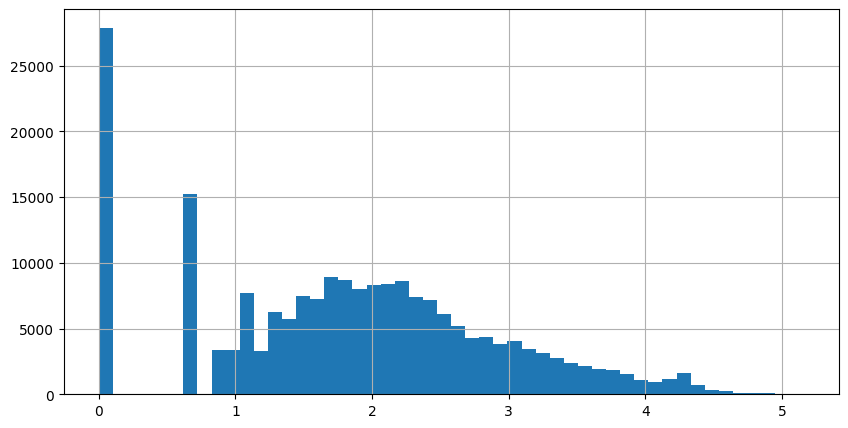

In [479]:
df = df.assign(
  catering_ln=df.catering.apply(log1p)
)
df.catering_ln.hist(bins=50)
plt.show()

1.8330117640685921


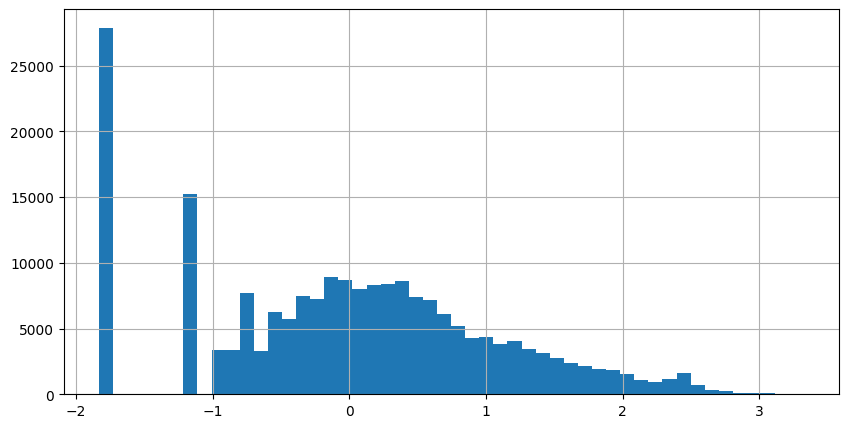

In [480]:
median = df.catering_ln.median()
print(median)
df = df.assign(
  catering_ln_center=df.catering_ln.apply(lambda x: x - median)
)
df.catering_ln_center.hist(bins=50)
plt.show()

q25 = -0.7343994754004826 
q75 = 0.672163743721457


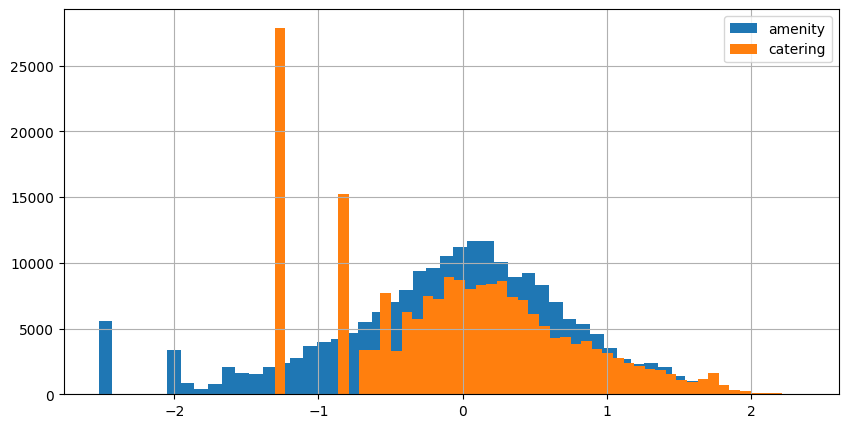

In [481]:
q25, q75 = df.catering_ln_center.quantile(q=0.25), df.catering_ln_center.quantile(q=0.75)
print("q25 =", q25, "\nq75 =", q75)

median = df.catering_ln_center.median()
df = df.assign(
  catering_ln_center_norm=df.catering_ln_center.apply(lambda x: (x - median) / (q75 - q25))
)
df.amenity_ln_center_norm.hist(bins=50, label='amenity')
df.catering_ln_center_norm.hist(bins=50, label='catering')
plt.legend()
plt.show()

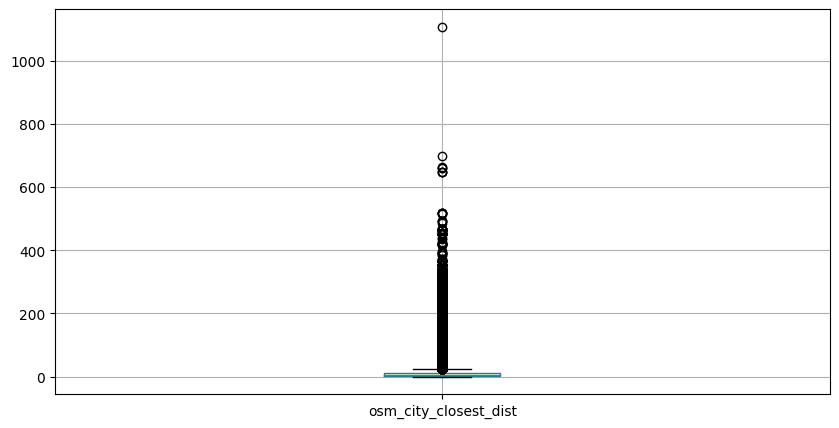

In [482]:
df.boxplot('osm_city_closest_dist')
plt.show()

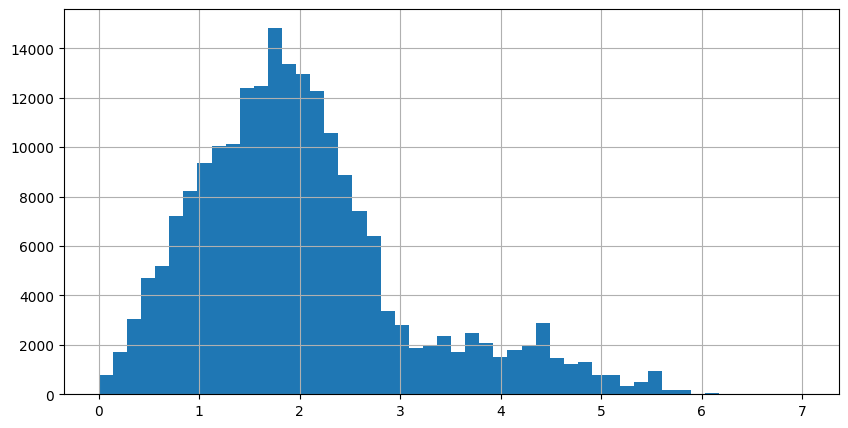

In [483]:
df = df.assign(
  city_closest_dist_ln=df.osm_city_closest_dist.apply(log1p)
)
df.city_closest_dist_ln.hist(bins=50)
plt.show()

1.8566587390605132


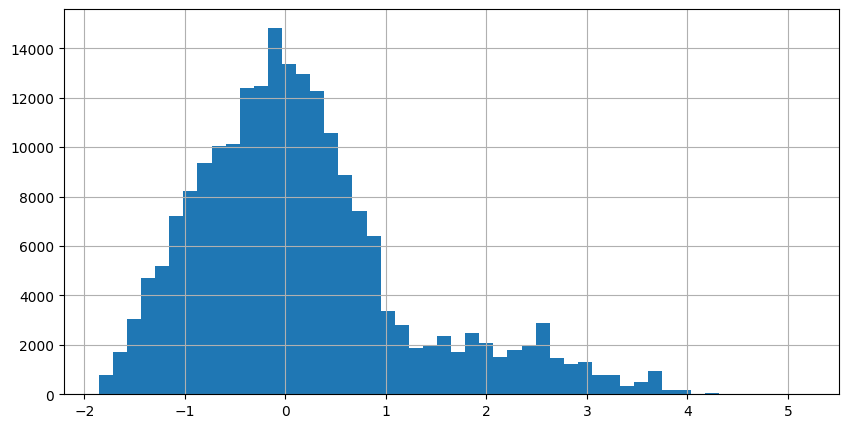

In [484]:
median = df.city_closest_dist_ln.median()
print(median)
df = df.assign(
  city_closest_dist_ln_center=df.city_closest_dist_ln.apply(lambda x: x - median)
)
df.city_closest_dist_ln_center.hist(bins=50)
plt.show()

q25 = -0.5752045817094054 
q75 = 0.6152837783252896


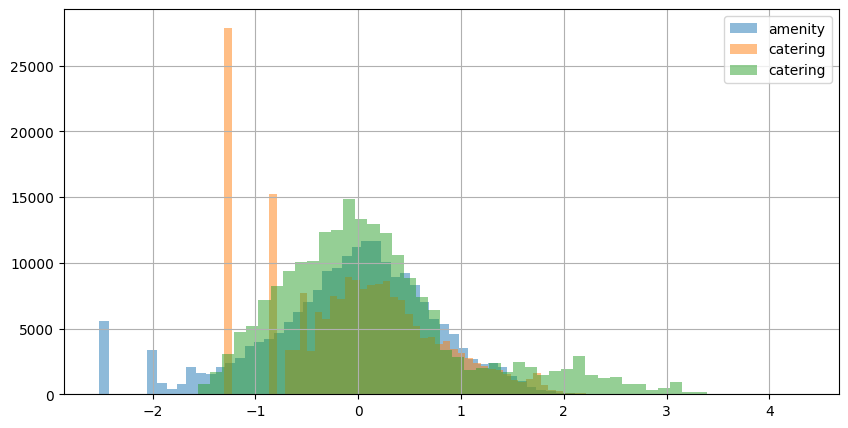

In [485]:
q25, q75 = df.city_closest_dist_ln_center.quantile(q=0.25), df.city_closest_dist_ln_center.quantile(q=0.75)
print("q25 =", q25, "\nq75 =", q75)

median = df.city_closest_dist_ln_center.median()
df = df.assign(
  city_closest_dist_ln_center_norm=df.city_closest_dist_ln_center.apply(lambda x: (x - median) / (q75 - q25))
)
df.amenity_ln_center_norm.hist(bins=50, label='amenity', alpha=0.5)
df.catering_ln_center_norm.hist(bins=50, label='catering', alpha=0.5)
df.city_closest_dist_ln_center_norm.hist(bins=50, label='city closest dist', alpha=0.5)
plt.legend()
plt.show()

In [486]:
nearestCityFrequency = df.osm_city_nearest_name.value_counts(normalize=True)
print(nearestCityFrequency)

def isMediumNearestCity(name):
  return nearestCityFrequency[name] >= 0.005 and nearestCityFrequency[name] <= 0.018

def isSmallNearestCity(name):
  return nearestCityFrequency[name] >= 0.001 and nearestCityFrequency[name] < 0.005 

def isLittleNearestCity(name):
  return nearestCityFrequency[name] >= 0.001 and nearestCityFrequency[name] < 0.005 

df = df.assign(
  nearest_city_moskow=((df.osm_city_nearest_name == "Москва")).astype(int),
  nearest_city_saint_petersburg=((df.osm_city_nearest_name == "Санкт-Петербург")).astype(int),
  nearest_city_krasnodar=((df.osm_city_nearest_name == "Краснодар")).astype(int),
  nearest_city_ekaterinburg=((df.osm_city_nearest_name == "Екатеринбург")).astype(int),
  nearest_city_novosibirsk=((df.osm_city_nearest_name == "Новосибирск")).astype(int),
  nearest_city_chelyabinsk=((df.osm_city_nearest_name == "Челябинск")).astype(int),
  nearest_city_samara=((df.osm_city_nearest_name == "Самара")).astype(int),
  nearest_city_kazan=((df.osm_city_nearest_name == "Казань")).astype(int),
  nearest_city_tymen=((df.osm_city_nearest_name == "Тюмень")).astype(int),
  nearest_city_podolsk=((df.osm_city_nearest_name == "Подольск")).astype(int),
  nearest_city_ufa=((df.osm_city_nearest_name == "Уфа")).astype(int),
  nearest_city_nino=((df.osm_city_nearest_name == "Нижний Новгород")).astype(int),
  nearest_city_rod=((df.osm_city_nearest_name == "Ростов-на-Дону")).astype(int),
  nearest_city_medium=((df.osm_city_nearest_name.apply(isMediumNearestCity))).astype(int),
  nearest_city_small=((df.osm_city_nearest_name.apply(isSmallNearestCity))).astype(int),
  nearest_city_little=((df.osm_city_nearest_name.apply(isLittleNearestCity))).astype(int)
)

Москва               0.133891
Санкт-Петербург      0.067573
Краснодар            0.052893
Екатеринбург         0.033689
Челябинск            0.025475
Новосибирск          0.023882
Самара               0.023722
Казань               0.023373
Тюмень               0.023175
Подольск             0.022332
Уфа                  0.019663
Нижний Новгород      0.019436
Ростов-на-Дону       0.018564
Пермь                0.017145
Воронеж              0.016419
Люберцы              0.016012
Новороссийск         0.015217
Красноярск           0.014166
Химки                0.014026
Калининград          0.012801
Ставрополь           0.011793
Саратов              0.011149
Одинцово             0.011033
Долгопрудный         0.010161
Сочи                 0.009633
Волгоград            0.009536
Красногорск          0.009304
Омск                 0.009042
Иркутск              0.009033
Мытищи               0.008921
Барнаул              0.008703
Ижевск               0.007875
Кемерово             0.007163
Пенза     

In [487]:
# mean, std = df.osm_city_nearest_population.apply(log1p).mean(), df.osm_city_nearest_population.apply(log1p).std()
# print(mean, std)
# df.osm_city_nearest_population.apply(lambda x: ((x + mean) / std)).hist(bins=50)
# plt.show()

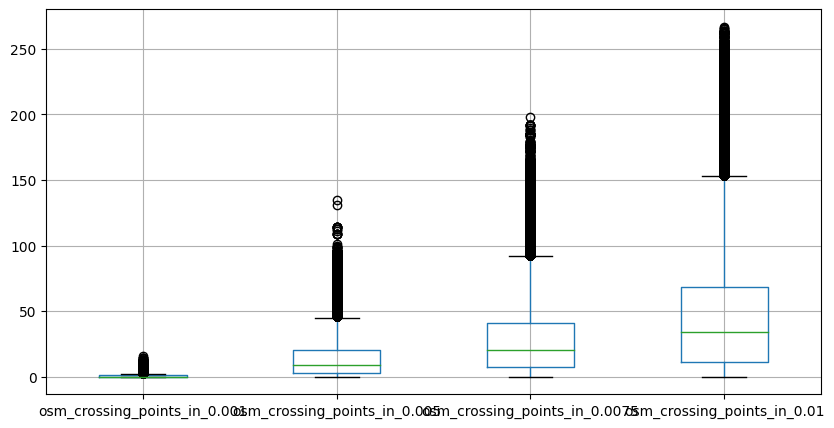

In [488]:
df.boxplot(['osm_crossing_points_in_0.001',
            'osm_crossing_points_in_0.005',
            'osm_crossing_points_in_0.0075',
            'osm_crossing_points_in_0.01'
])
plt.show()

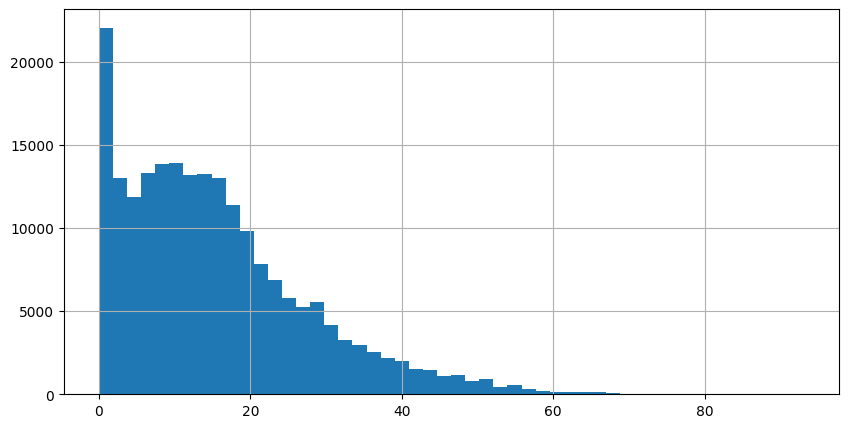

In [489]:
df = df.assign(
  crossing=df.apply(lambda row: amenityDependency(row['osm_crossing_points_in_0.001'], 
                                                    row['osm_crossing_points_in_0.005'],
                                                    row['osm_crossing_points_in_0.0075'],
                                                    row['osm_crossing_points_in_0.01']), 
                    axis=1)
)
df.crossing.hist(bins=50)
plt.show()

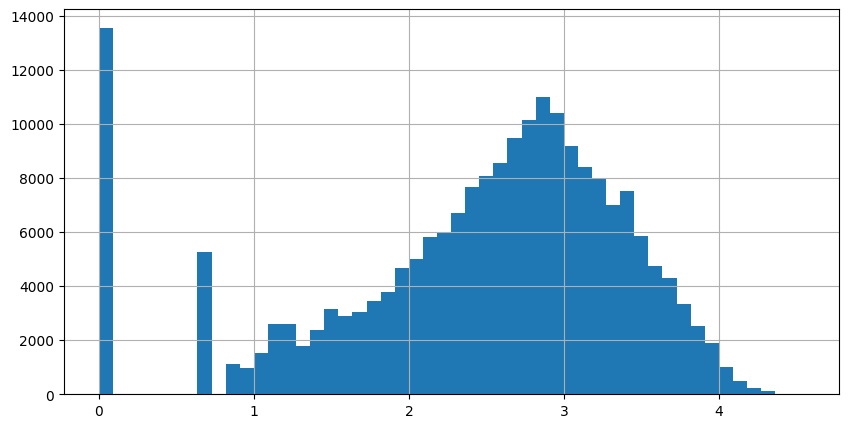

2.6611808973686095


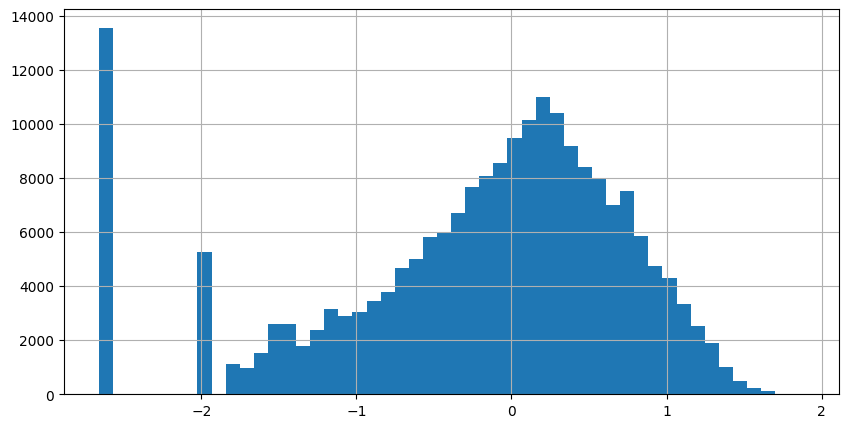

q25 = -0.6838685172746113 
q75 = 0.46787689173831526


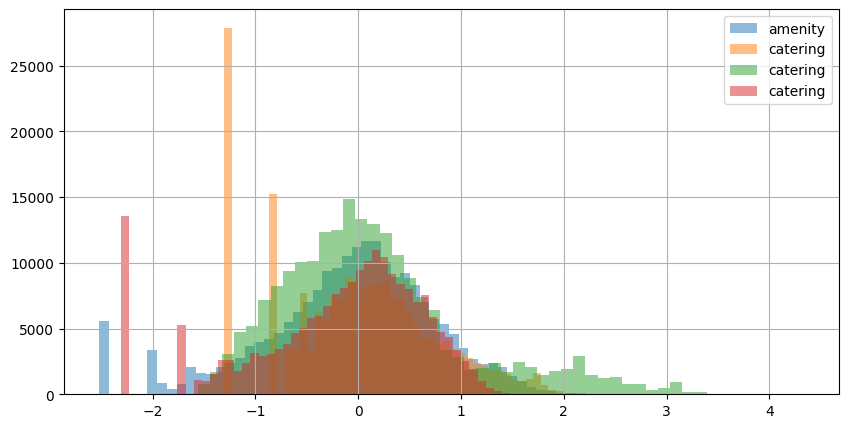

In [490]:
df = df.assign(
  crossing_ln=df.crossing.apply(log1p)
)
df.crossing_ln.hist(bins=50)
plt.show()

median = df.crossing_ln.median()
print(median)
df = df.assign(
  crossing_ln_center=df.crossing_ln.apply(lambda x: x - median)
)
df.crossing_ln_center.hist(bins=50)
plt.show()

q25, q75 = df.crossing_ln_center.quantile(q=0.25), df.crossing_ln_center.quantile(q=0.75)
print("q25 =", q25, "\nq75 =", q75)

median = df.crossing_ln_center.median()
df = df.assign(
  crossing_ln_center_norm=df.crossing_ln_center.apply(lambda x: (x - median) / (q75 - q25))
)
df.amenity_ln_center_norm.hist(bins=50, label='amenity', alpha=0.5)
df.catering_ln_center_norm.hist(bins=50, label='catering', alpha=0.5)
df.city_closest_dist_ln_center_norm.hist(bins=50, label='city closest dist', alpha=0.5)
df.crossing_ln_center_norm.hist(bins=50, label='crossing', alpha=0.5)
plt.legend()
plt.show()

culture_points kinda :(

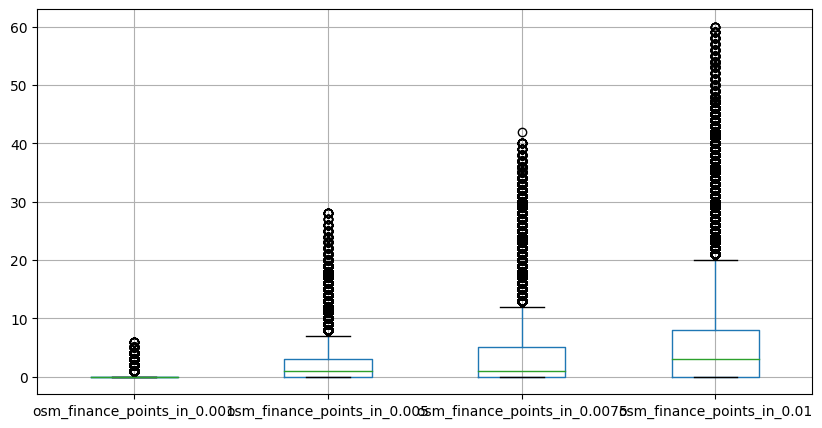

In [491]:
df.boxplot(['osm_finance_points_in_0.001',
            'osm_finance_points_in_0.005',
            'osm_finance_points_in_0.0075',
            'osm_finance_points_in_0.01'
])
plt.show()

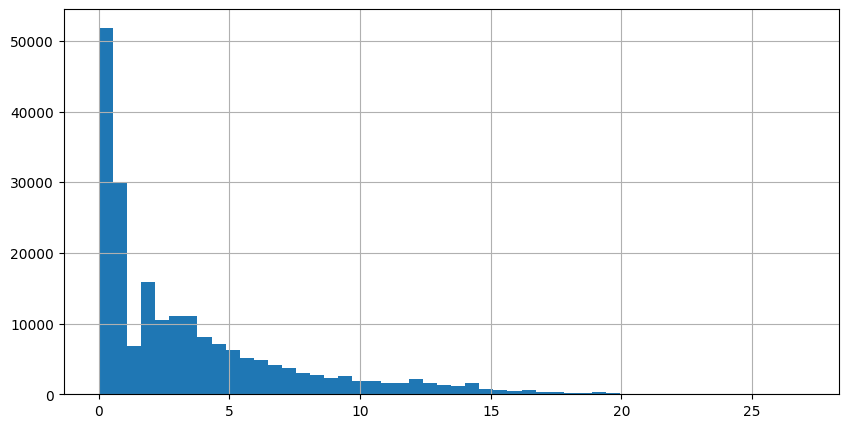

In [492]:
df = df.assign(
  finance=df.apply(lambda row: amenityDependency(row['osm_finance_points_in_0.001'], 
                                                  row['osm_finance_points_in_0.005'],
                                                  row['osm_finance_points_in_0.0075'],
                                                  row['osm_finance_points_in_0.01']), 
                    axis=1)
)
df.finance.hist(bins=50)
plt.show()

:(

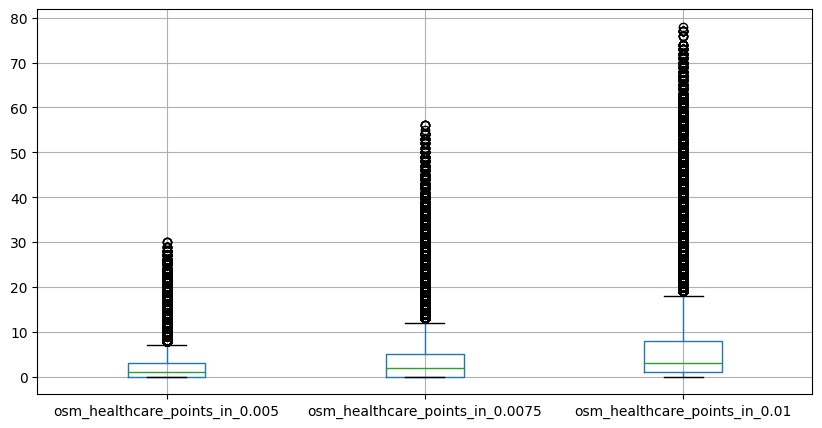

In [493]:
df.boxplot(['osm_healthcare_points_in_0.005',
            'osm_healthcare_points_in_0.0075',
            'osm_healthcare_points_in_0.01'
])
plt.show()

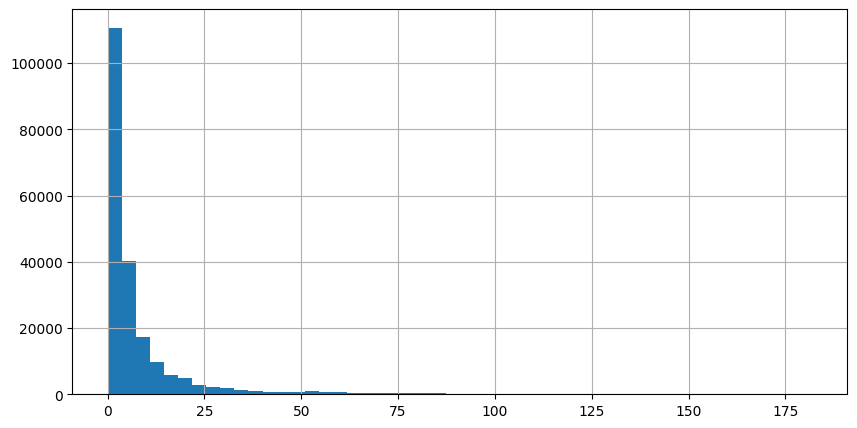

In [494]:
df = df.assign(
  healthcare=df.apply(lambda row: amenityDependency(row['osm_healthcare_points_in_0.005'],
                                                    row['osm_healthcare_points_in_0.0075'],
                                                    row['osm_healthcare_points_in_0.01'], 
                                                    row['osm_healthcare_points_in_0.01']), 
                    axis=1)
)
df.healthcare.hist(bins=50)
plt.show()

:(

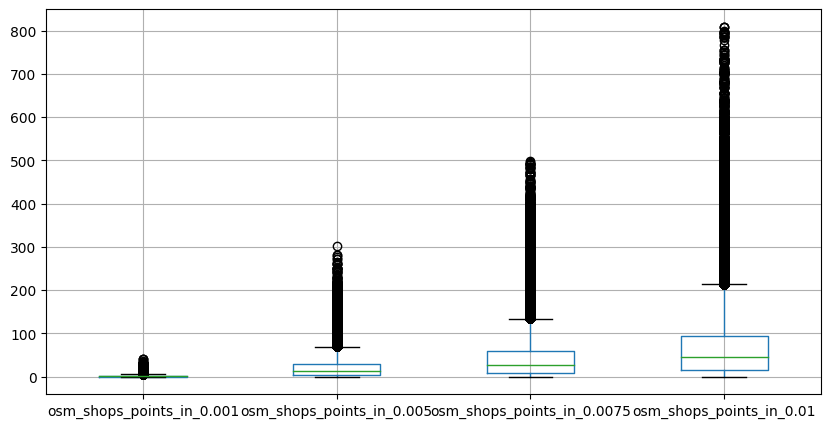

In [497]:
df.boxplot(['osm_shops_points_in_0.001',
            'osm_shops_points_in_0.005',
            'osm_shops_points_in_0.0075',
            'osm_shops_points_in_0.01'
])
plt.show()

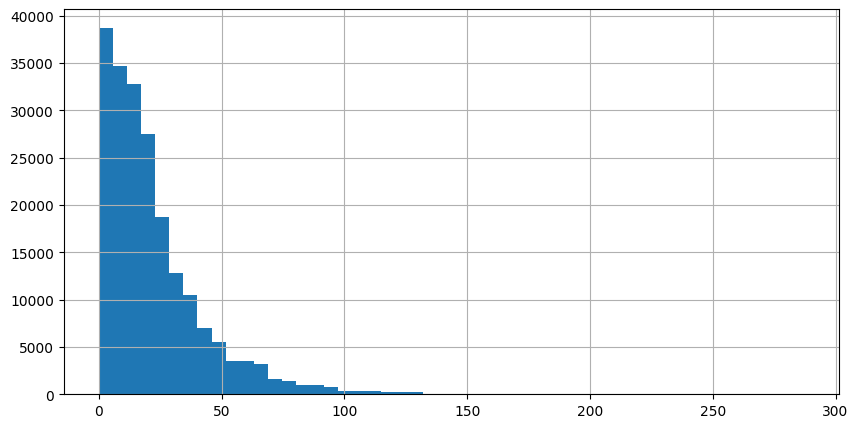

In [498]:
df = df.assign(
  shops=df.apply(lambda row: amenityDependency(row['osm_shops_points_in_0.001'], 
                                                row['osm_shops_points_in_0.005'],
                                                row['osm_shops_points_in_0.0075'],
                                                row['osm_shops_points_in_0.01']), 
                    axis=1)
)
df.shops.hist(bins=50)
plt.show()

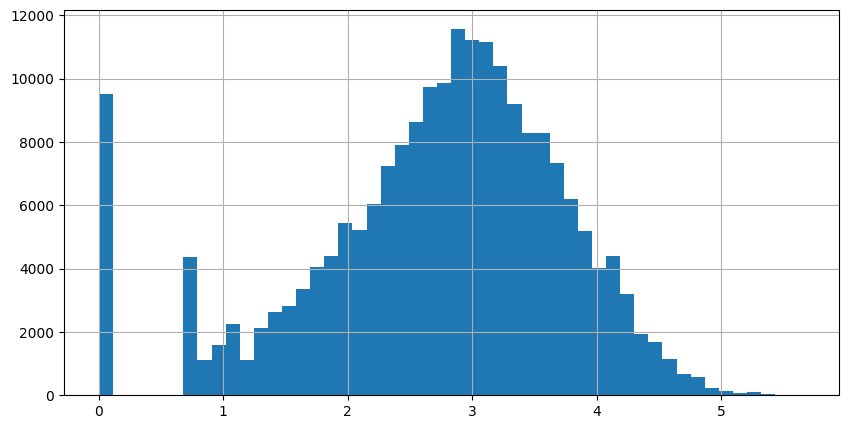

2.870286312992593


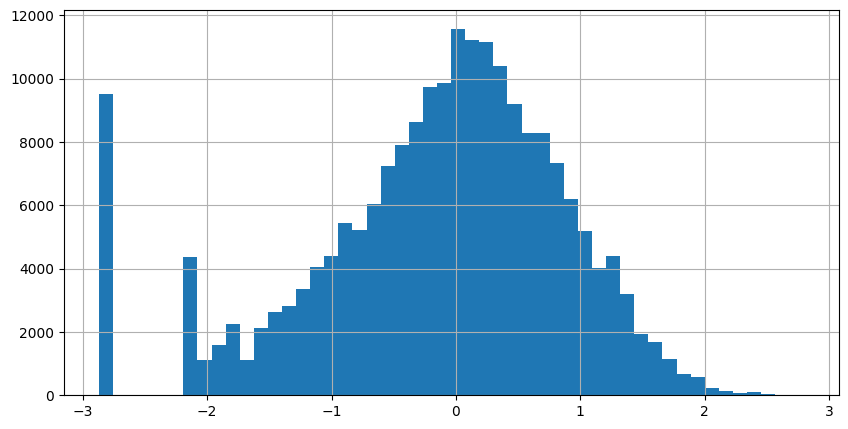

q25 = -0.6878932157342572 
q75 = 0.5515500353529719


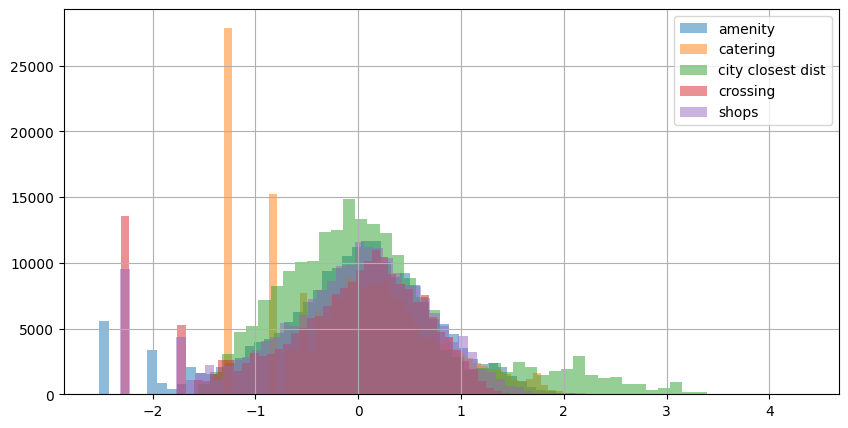

In [499]:
df = df.assign(
  shops_ln=df.shops.apply(log1p)
)
df.shops_ln.hist(bins=50)
plt.show()

median = df.shops_ln.median()
print(median)
df = df.assign(
  shops_ln_center=df.shops_ln.apply(lambda x: x - median)
)
df.shops_ln_center.hist(bins=50)
plt.show()

q25, q75 = df.shops_ln_center.quantile(q=0.25), df.shops_ln_center.quantile(q=0.75)
print("q25 =", q25, "\nq75 =", q75)

median = df.shops_ln_center.median()
df = df.assign(
  shops_ln_center_norm=df.shops_ln_center.apply(lambda x: (x - median) / (q75 - q25))
)
df.amenity_ln_center_norm.hist(bins=50, label='amenity', alpha=0.5)
df.catering_ln_center_norm.hist(bins=50, label='catering', alpha=0.5)
df.city_closest_dist_ln_center_norm.hist(bins=50, label='city closest dist', alpha=0.5)
df.crossing_ln_center_norm.hist(bins=50, label='crossing', alpha=0.5)
df.shops_ln_center_norm.hist(bins=50, label='shops', alpha=0.5)
plt.legend()
plt.show()

In [503]:
df.to_csv('processed_data/00-features.csv', index=False)